In [174]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [175]:
data = pd.read_csv('train.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [176]:
len(data)

891

In [177]:
data.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

### Age range of passengers
* Youngest is less than 1 year old
* Oldest is 80 years old

In [178]:
data['Age'].min(), data['Age'].max()

(0.42, 80.0)

### Total number of survivors and deaths

In [179]:
data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

### Percent of survivors

In [180]:
data['Survived'].value_counts()*100 / len(data)

Survived
0    61.616162
1    38.383838
Name: count, dtype: float64

In [181]:
data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

### Number of passengers separated by cabin class

In [182]:
data['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

### Below is a graph of survivors
* "1" is survived
* "0" is did not survive

### Determining the percentage of survivors by sex

In [183]:
alive = data[data['Survived'].eq(1)]['Survived'].value_counts()

In [184]:
round(data[data['Survived'].eq(1)]['Sex'].value_counts().astype(int) *100 / alive[1],2)


Sex
female    68.13
male      31.87
Name: count, dtype: float64

<Axes: title={'center': 'Number of Survivors'}, xlabel='Survived'>

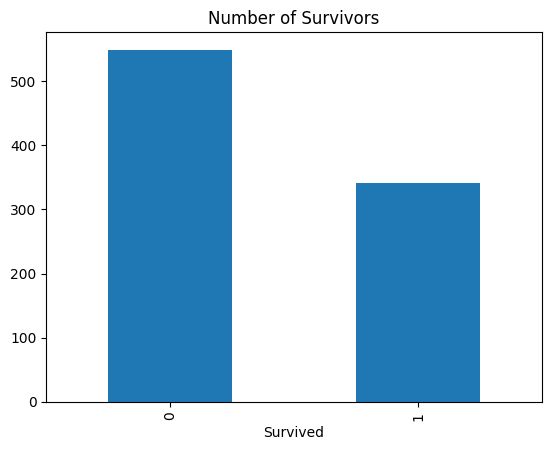

In [185]:
alpha_color = 0.5
data['Survived'].value_counts().plot(kind='bar', title='Number of Survivors')

<Axes: title={'center': 'Passengers Separated by Sex'}, xlabel='Sex'>

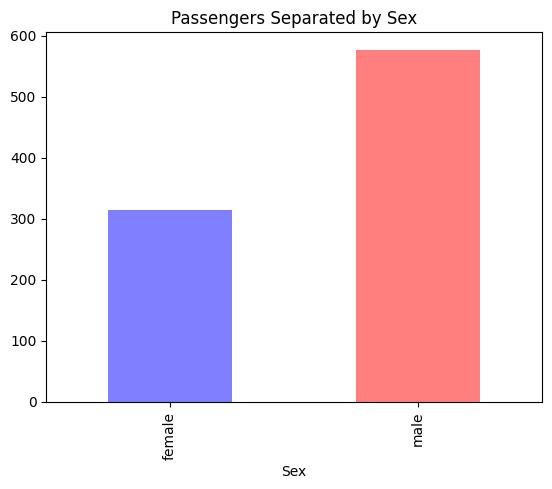

In [186]:
data['Sex'].value_counts().sort_index().plot(kind='bar', color=['b', 'r'], alpha = alpha_color, title='Passengers Separated by Sex')

<Axes: title={'center': 'Passengers Separated by Cabin Class'}, xlabel='Pclass'>

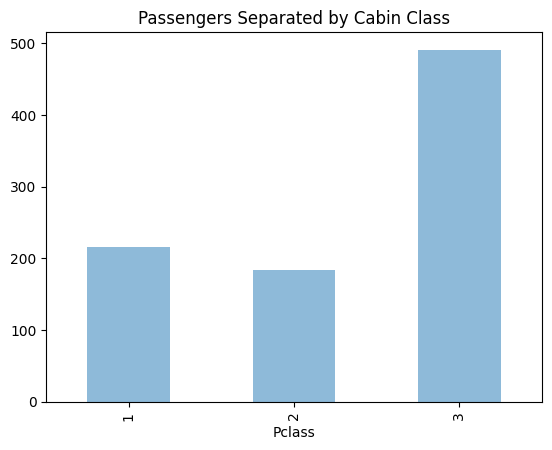

In [187]:
data['Pclass'].value_counts().sort_index().plot(kind='bar', alpha = alpha_color, title='Passengers Separated by Cabin Class')

<Axes: title={'center': 'Survivors Separated by Cabin Class'}, xlabel='Pclass'>

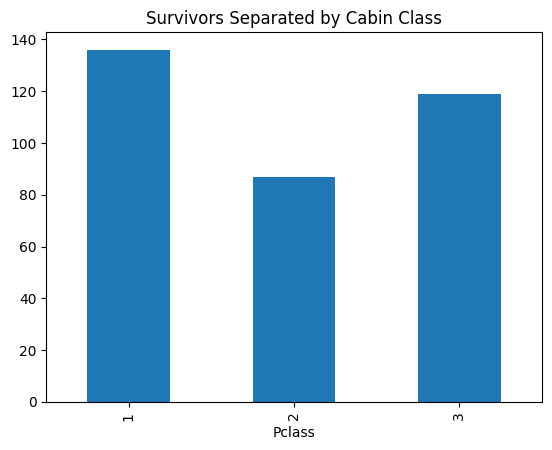

In [188]:
data[data['Survived']==1]['Pclass'].value_counts().sort_index().plot(kind='bar', title='Survivors Separated by Cabin Class')

<Axes: title={'center': 'Scatter Plot of Survivors Separated by Age'}, xlabel='Survived', ylabel='Age'>

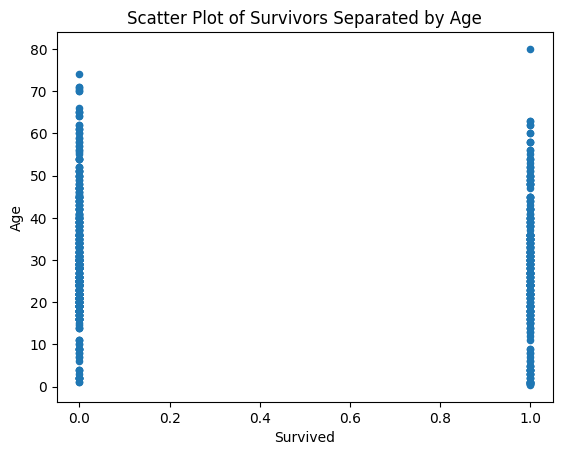

In [189]:
data.plot(kind='scatter', x='Survived', y='Age', title='Scatter Plot of Survivors Separated by Age')

### Due to the distribution, the visualization was difficult to distinguish by age group
* Below is a bar graph at attempt to display a better visualization

<Axes: title={'center': 'Survivors by Age'}, xlabel='Age'>

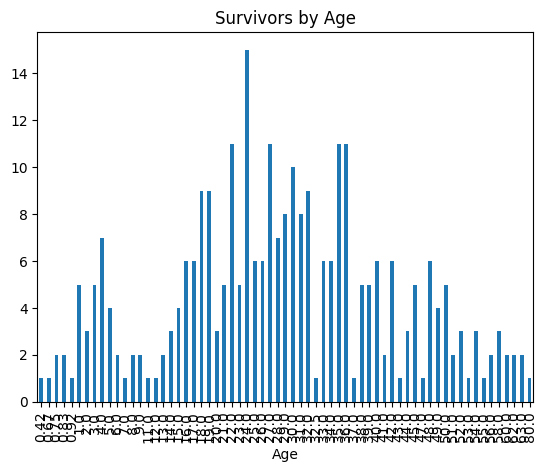

In [190]:
data[data['Survived']==1]['Age'].value_counts().sort_index().plot(kind='bar', title='Survivors by Age')

### The age range varied too much, causing over lapping displays in the x-axis
* To present a better display, the age need to be separated into groups / bins

In [191]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
data['AgeBin'] = pd.cut(data['Age'], bins)

<Axes: title={'center': 'Passenger by Age Groups'}, xlabel='AgeBin'>

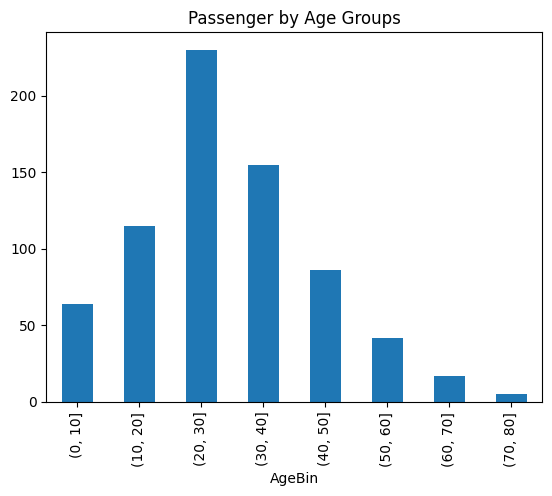

In [192]:
data['AgeBin'].value_counts().sort_index().plot(kind='bar', title='Passenger by Age Groups')

<Axes: title={'center': 'Survivors by Age Groups'}, xlabel='AgeBin'>

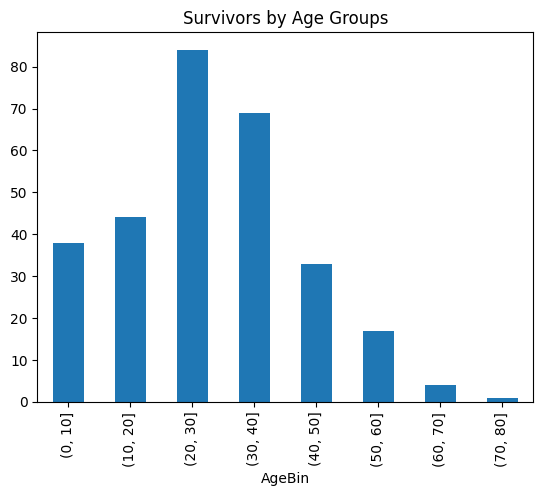

In [193]:
data[data['Survived']==1]['AgeBin'].value_counts().sort_index().plot(kind='bar', title='Survivors by Age Groups')

<Axes: title={'center': 'Death by Age Groups'}, xlabel='AgeBin'>

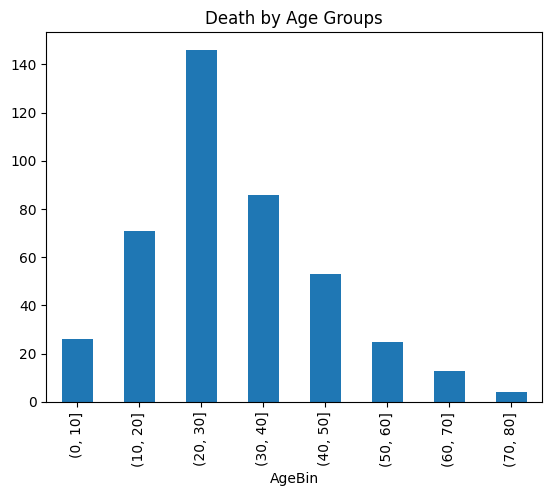

In [194]:
data[data['Survived']==0]['AgeBin'].value_counts().sort_index().plot(kind='bar', title='Death by Age Groups')

<Axes: title={'center': 'Survivors by Age Group'}, xlabel='Age Group', ylabel='Count'>

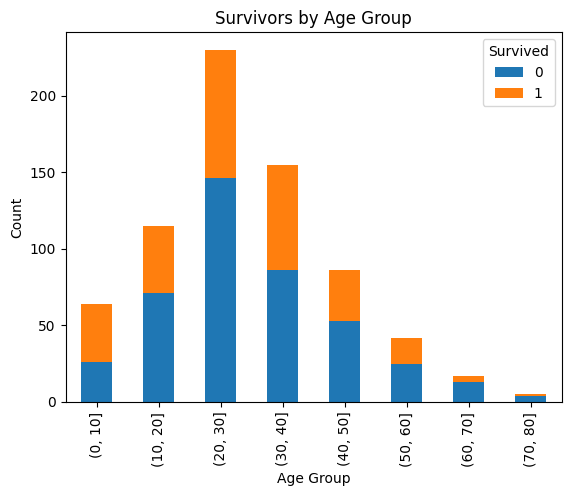

In [195]:
a = data.filter(['AgeBin', 'Survived'])
b = a.pivot_table(index='AgeBin', columns=['Survived'], aggfunc=len)
b
b.plot(kind='bar',stacked = True, xlabel="Age Group", ylabel="Count", title = 'Survivors by Age Group')

# Credit to https://stackoverflow.com/questions/67558783/how-to-create-stacked-bar-chart-in-python-color-coded-by-category

Let's discover the number of female and male survivor

<Axes: title={'center': 'Number of Male Survivors and Death'}, xlabel='Male Survivor'>

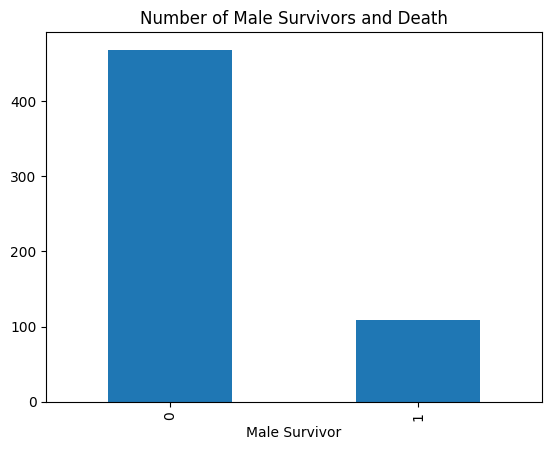

In [196]:
data[data['Sex']=='male']['Survived'].value_counts().plot(kind='bar', xlabel= 'Male Survivor', title= 'Number of Male Survivors and Death')

<Axes: title={'center': 'Number of Female Survivors and Death'}, xlabel='Female Survivor'>

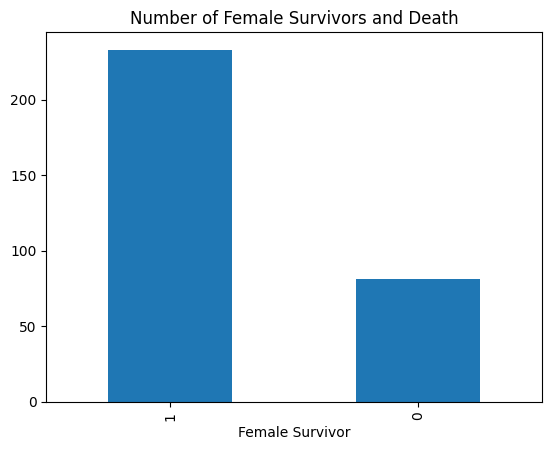

In [197]:
data[data['Sex']=='female']['Survived'].value_counts().plot(kind='bar', xlabel= 'Female Survivor', title= 'Number of Female Survivors and Death')

Let's investigate the number of males who survive and separate them by class

<Axes: title={'center': 'Male Survivors and Death Separated by Cabin Class'}, xlabel='Male Survivor'>

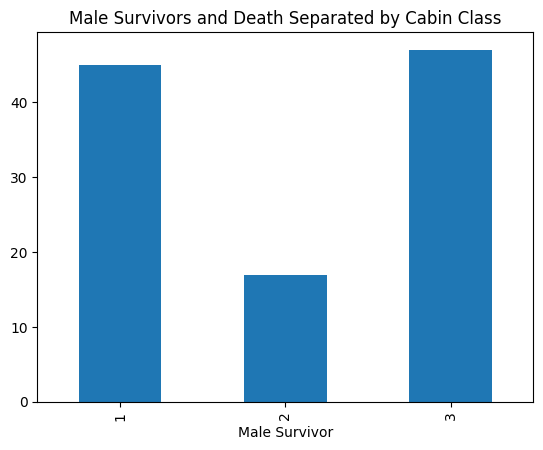

In [198]:
data[(data['Sex']=='male') & (data['Survived']== 1)]['Pclass'].value_counts().sort_index().plot(kind='bar', xlabel= 'Male Survivor', title= 'Male Survivors and Death Separated by Cabin Class')

<Axes: title={'center': 'Female Survivors and Death Separated by Cabin Class'}, xlabel='Female Survivor'>

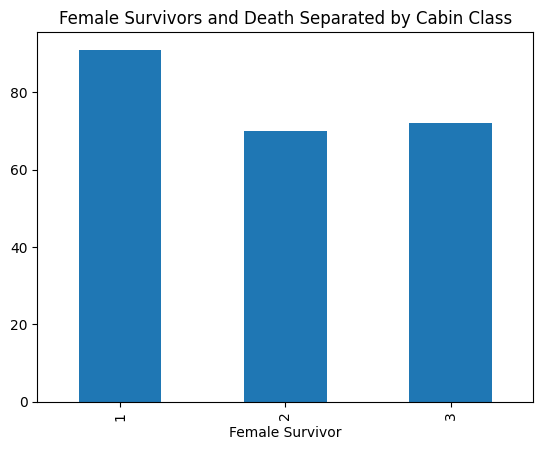

In [199]:
data[(data['Sex']=='female') & (data['Survived']== 1)]['Pclass'].value_counts().sort_index().plot(kind='bar', xlabel= 'Female Survivor', title= 'Female Survivors and Death Separated by Cabin Class')

## Conclusion
* Majority of survivors are female
    + Majority are from 1st class but 2nd and 3rd class is about the even
    + Majority of male survivors are from 1st and 3rd cabin
* Majority of survivors are from 1st and 3rd class cabins
* The age of majority survivors range from 20-40
    + The survival rate decreases as the passengers get younger and older
* The age distribution of the passengers is a normal type
    + Survival and death distribution is a a reflection of the total number of passengers 